<div style="border:solid green 3px; padding: 20px">
<b>🥇 Ярослав, спасибо за доработки, проект принят, молодец!</b>
    
Ты провел  хорошую работу над ошибками! Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

<div style="border:solid green 2px; padding: 20px">
Ярослав, привет! Меня зовут Ефимов Денис и сегодня я буду делать ревью твоего проекта!
    
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> Некритичное замечание, рекомендация.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Ты проделал огромную работу :)
- У меня есть несколько замечаний, исправив которые ты сделаешь проект  лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Название проекта можно выделить так:</div>

# Анализ сервиса аренды самокатов GoFast

Анализ сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.
Описание данных

Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя
name — имя пользователя
age — возраст
city — город
subscription_type — тип подписки (free, ultra)

Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date — дата совершения поездки

Подписки — subscriptions_go.csv

subscription_type — тип подписки
minute_price — стоимость одной минуты поездки по данной подписке
start_ride_price — стоимость начала поездки
subscription_fee — стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

In [1]:
#загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

In [2]:
#Выводим первые строки каждого набора данных. Изучаем общую информацию о каждом датафрейме.
#Сначала загрузим все таблицы и сохраним в датафрейм 
data_users_go = pd.read_csv('/datasets/users_go.csv')
data_rides_go = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
#Изучаем таблицу пользователи
data_users_go.info()
data_users_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
#Изучаем таблицу поездки
data_rides_go.info()
data_rides_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
#Изучаем таблицу подписки
data_subscriptions_go.info()
data_subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод:
В представленных данных:

data_users_go 1565 записи, пропуски отсутствуют, количество явных дубликатов 31 (выявлено ниже)
data_users_go 18068 записи, пропуски отсутствуют, явных дубликатов нет, проблема со типом данных в столбце date
data_subscriptions_go 2 записи, пропуски отсутствуют, явных дубликатов нет. 

Общее:
Названия столбцов в норме. 

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
После каждого пункта нужно делать промежуточный вывод.
    
Что мы можем сказать о данных после первичного знакомства  с ними? Стоит отметить объем и полноту данных, корректность наименования столбцов и соответствие типов данных.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Написал вывод, ✔
</div>


#### Шаг 2. Предобработка данных

In [6]:
sorted_dates = sorted(data_rides_go['date'].unique())
first_date = sorted_dates[0]
last_date = sorted_dates[-1]
print(f"Первое значение: {first_date}")
print(f"Последнее значение: {last_date}")

Первое значение: 2021-01-01
Последнее значение: 2021-12-30


In [7]:
data_subscriptions_go# Приводим столбец date к типу даты pandas.
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format='%Y-%m-%d')

In [8]:
# Создаем новый столбец с номером месяца на основе столбца date.
data_rides_go['month'] = data_rides_go['date'].dt.month

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Дополнительно лучше проверить данные за какой период у нас имеются, чтобы в дальнейшем не допустить ошибок при группировке по месяцам.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Добавил код ✔
</div>


In [9]:
#Ищем явные дубликаты
print('Количество явных дубликатов в таблице пользователи = ', data_users_go.duplicated().sum())
print('Количество явных дубликатов в таблице поездки = ', data_rides_go.duplicated().sum())
print('Количество явных дубликатов в в таблице подписки = ', data_subscriptions_go.duplicated().sum())

Количество явных дубликатов в таблице пользователи =  31
Количество явных дубликатов в таблице поездки =  0
Количество явных дубликатов в в таблице подписки =  0


In [10]:
#Удалим дубликаты
data_users_go.drop_duplicates(inplace=True)

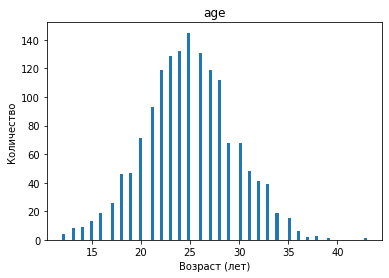

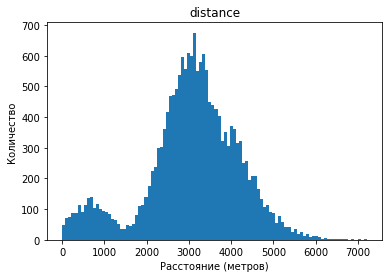

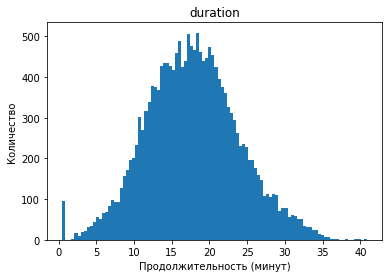

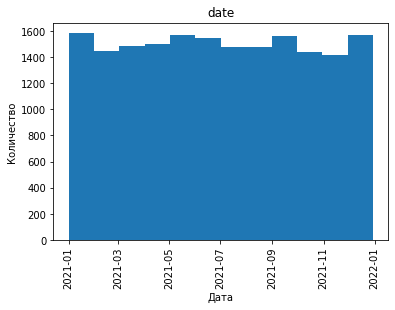

In [11]:
#Для понимания пропусков в данных надо построить гистограммы 

plt.hist(data_users_go['age'], bins=100)
plt.title('age')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество')
plt.show()

plt.hist(data_rides_go['distance'], bins=100)
plt.title('distance')
plt.xlabel('Расстояние (метров)')
plt.ylabel('Количество')
plt.show()

plt.hist(data_rides_go['duration'], bins=100)
plt.title('duration')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Количество')
plt.show()

plt.hist(data_rides_go['date'], bins=12)
plt.title('date')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Ты уже забегаешь в исследовательский анализ. В первом пункте нам нужно только загрузить данные, вывести несколько строк на экран из каждой таблицы и ознакомиться с общей информацией о данных. </div>

Вывод : Данные нормализированы 

Пропущенных данных в таблицах нет.

Дубликаты имеются среди пользователей, удалили строки-дубликаты.

Добавили столбец month с номер месяца.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Предобработка данных проведена успешно! Можно приступать к исследованию)</div>

#### Шаг 3. Исследовательский анализ данных

In [12]:
# Описываем и визуализируем общую информацию о пользователях и поездках
# Начнем с частоты встречаемости городов
count_users_by_city = data_users_go['city'].value_counts()
count_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

<AxesSubplot:title={'center':'Распределение пользователей по городам'}>

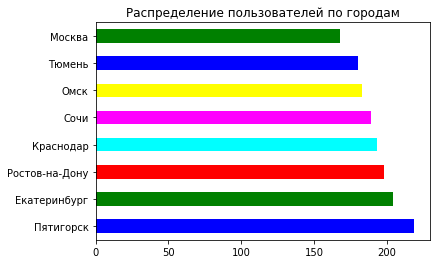

In [13]:
data_users_go['city'].value_counts().sort_values(ascending=False).plot.barh(title='Распределение пользователей по городам', color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 

Не забывай подписывать оси.</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Круговая диаграмма тут не подходит, доли получаются практически равными и сложно выделить лидеров. Вообще, если значений, отображаемых на графике, более 6, то использовать круговую диаграмму не рекомендуется.
    
Тут подойдет горизонтальный барплот с сортировкой по убыванию.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Убрал круговую сделал барплот ✔
</div>


Вывод: Пятягорск занимает 14% выборки и встречается 219 раз

In [14]:
# Смотрим соотношение пользователей с подпиской и без подписки
count_sub = data_users_go['subscription_type'].value_counts()
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

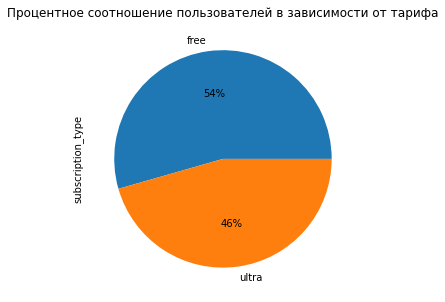

In [15]:
data_users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_sub, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> А вот тут круговая диаграмма отлично подходит!</div>

Вывод: На первом тарифе "Без пописки" количество 835 пользователей и 54% выборки

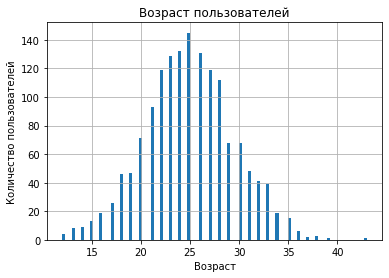

In [16]:
# Смотрим возраст пользователей
plt.hist(data_users_go['age'], bins = 100)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Очень хорошо, что подписываешь графики и оси. </div>

In [17]:
age_users = data_users_go['age'].value_counts()
age_users

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

Вывод: Самый старый (суперстар) пользователь 43 года, самый молодой 12 лет. Большее количество 25 лет

In [18]:
# Изучаем расстояние, которое пользователь преодолел за одну поездку
data_rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Здорово, что используешь метод `describe()` как дополнительный инструмент анализа.</div>

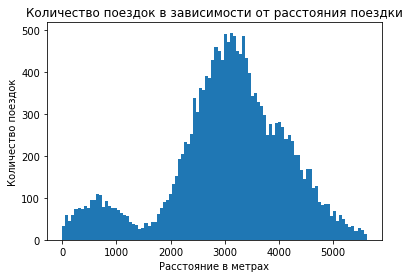

In [19]:
plt.hist(data_rides_go['distance'], bins=100, range=(1,5620))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Вывод: Самая длинная поездка 7 км, самая короткая 800 метров. Больше всего ездят на 3 км.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, чем можно объяснить два пиковых значения на распределении?</div>

In [20]:
# Продолжительность поездок
data_rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

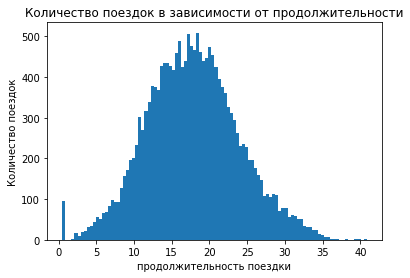

In [21]:
plt.hist(data_rides_go['duration'], bins=100)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

А зачем ты делаешь огрничение диапазона значений? Так мы можем упустить важные детали. Параметр range следует убрать, тогда мы сможем заметить странный пик около 0. Строки с этими поездками и их параметры стоит рассмотреть подробнее на предмет аномалий.</div>

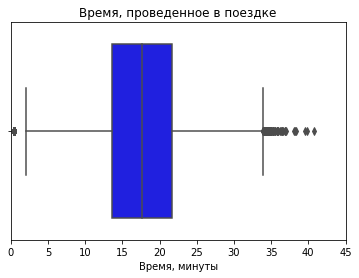

In [22]:
sns.boxplot(x = data_rides_go['duration'], color='blue')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)

Вывод: больше всего ездят от 15 до 20 минут. Самая короткая поезда меньше минуты, самая длинная 40 минут

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [23]:
#  Мержим пользователе и поезки (data_users_go + data_rides_go )
all_data = data_users_go.merge(data_rides_go)

In [24]:
# Мержим выше созданную таблицу с подписками (all_data + data_subscriptions_go)
all_data = all_data.merge(data_subscriptions_go)

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Лучше всегда явно указывать столбец, по которому происходит объединение таблиц.

</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Указал в коментах ✔
</div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b>

В комментариях ты указал объединяемые таблицы. А по каким столбцам они объединяются? Это нужно указывать в качестве значения параметра `on`
</div>

In [25]:
# Проверяем
all_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [26]:
#проверяем полученную таблицу
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут стоит проверить количество строк полученной таблицы и сравнить ее с количеством строк таблиц до объединения, чтобы убедиться что мы ничего не потеряли и не добавили лишнего. А также проверить, не появились ли пропуски в таблице.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
done ✔
</div>

Создадим датафрейм с данными о пользователях без подписки

In [27]:
subfree = all_data.query("`subscription_type` == 'free'")

In [28]:
subfree

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Создадим датафрейм с данными о пользователях c подпиской Ultra

In [29]:
subultra = all_data.query("`subscription_type` == 'ultra'")

In [30]:
subultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Таблицы созданы верно!  </div>

Визуализируем информацию о расстоянии  и времени на тарифе без подписки

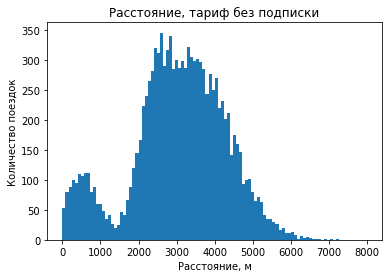

<Figure size 2160x2160 with 0 Axes>

In [31]:
plt.hist(subfree['distance'], bins=100, range = (0, 8000))
plt.title('Расстояние, тариф без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

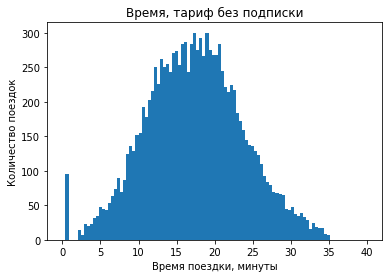

<Figure size 2160x2160 with 0 Axes>

In [32]:
plt.hist(subfree['duration'], bins=100, range = (0, 40))
plt.title('Время, тариф без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

"бесплатный тариф" писать не очень корректно, ведь он таким не является)</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил ✔
</div>

Визуализируем информацию о расстоянии и времени на тарифе 'Ultra' тарифе

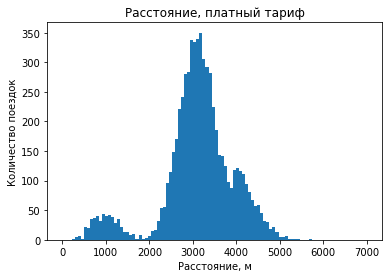

<Figure size 2160x2160 with 0 Axes>

In [33]:
plt.hist(subultra['distance'], bins=100, range = (0, 7000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

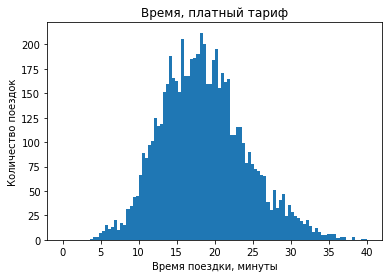

<Figure size 2160x2160 with 0 Axes>

In [34]:
plt.hist(subultra['duration'], bins=100, range = (0, 40))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(30,30))
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

  - Распределения для обеих групп пользователей можно объединить для наглядности, наложив их друг на друга.
  
  - Какие выводы можно сделать по построенным гистограммам? Есть ли различия в поведении двух групп пользователей?</div>

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [35]:
# Округляем продолжительность каждой поездки 
all_data['duration'] = np.ceil(all_data['duration']) 

In [36]:
users_months_revenue = all_data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

users_months_revenue.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]


users_months_revenue.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Также в сводную таблицу стоит добавить тип подписки, чтобы мы могли корректно и легко разделять пользователей.</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Метод округления продолжительности поездок выбран верный, но округлять необходимо каждую поездку, то есть в исходной объединенной таблице до агрегирования.


</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил, применил до формирования таблицы ✔ 
</div>

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [37]:
# Помесячная выручка считается по формуле: стоимость старта поездки \times×  
# количество поездок ++ стоимость одной минуты поездки \times× общая продолжительность всех поездок в минутах 
# ++ стоимость подписки.
users_months_revenue['revenue'] = (
users_months_revenue['start_ride_price']*users_months_revenue['count']+
users_months_revenue['minute_price']*users_months_revenue['duration']+
users_months_revenue['subscription_fee'])


In [38]:
print ('Выручка за 2021 год составила :',users_months_revenue['revenue'].sum(), 'руб.')

Выручка за 2021 год составила : 3878641.0 руб.


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Формула для расчета выручки верная, но результат получился не совсем правильным из-за некорректного округления продолжительности.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил ✔
</div>

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы перед проверкой!</div>

In [40]:
ultra = subultra['duration'] 

free = subfree['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


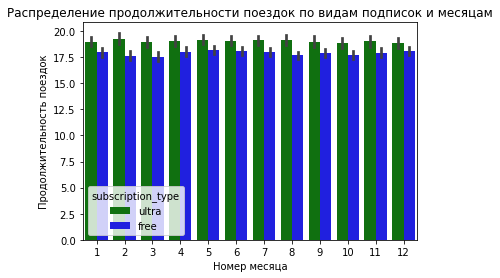

In [41]:
# Построим график для наглядности сравнения 
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = all_data,
            palette = ['green', 'blue'])
ax.set_title('Распределение продолжительности поездок по видам подписок и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность поездок');

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
На этом месте код падает с ошибкой. Это может быть причиной возврата проекта без проверки.

Необходимо отправлять на проверку проект с работающим кодом. Перед отправкой следует перезапустить весь проект `Kernel-->Restart & Run All` и убедиться, что все ячейки корректно отработали.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
исправил ✔
</div>

Вывод: Гипотеза о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе без подписки опровержена, знчачит - на тарифе Ultra, ездят больше (см.граффик)

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Тратят ли пользователи с подпиской больше времени на поездки?</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Дописал ✔
</div>

Нулевая гипотеза: Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, равно 3130 метров.
Альтернативная гипотеза:Среднее расстояние, преодоленное пользователями с подпиской за одну поездку, больше 3130 метров.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Альтернативную гипотезу тут нужно сформулировать о том, что пользователи с подпиской за одну сессию проезжают больше 3130 метров, тогда при получении любого результата проверки гипотезы мы сможем ответить на поставленный в задании вопрос.


P.S. Соответственно значение параметра alternative нужно будет изменить.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Переписал ✔
</div>

In [42]:
prev_screens_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    subultra['distance'], 
    prev_screens_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
При проверке гипотезы неверно выбрано значение для параметра alternative. В предыдущем комментарии я отметил, что это значение нужно изменить.

Оно указывается для выборки, идущей первым аргументом относительно выборки (в данном случае значения), идущей вторым аргументом.

Так как альтернативная гипотеза звучит так, что пользователи с подпиской в среднем проезжают расстояние более 3130 метров, то должно быть alternative='greater'.

</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 2:</b> 
Переписал ✔
</div>

Вывод:Нулевое предположение состоит в том, что среднее расстояние поездок для группы подписчиков не является оптимальным. Так как p-значение превышает уровень статистической значимости, у нас нет оснований отвергать это базовое предположение.

Меньшее расстояние поездок подписчиков позволяет планировать обновление и замену автопарка, исходя из приблизительных данных об износе.

<div class="alert alert-block alert-danger"><b>❌Комментарий ревьюера 3:</b> Мы не можем отвергнуть нулевую гипотезу. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?</div>

In [43]:
subultra['distance'].mean().round(1)

3115.4

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 3:</b> 
Среднее расстояни меньше и составляет 3115. Соотвественно можно сказать "то среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров" ✔
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 4:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Вывод неверный</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 2:</b> 
Переписал ✔
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Вывод нужно будет скорректировать.</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил ✔
</div>

Проверяем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (users_months_revenue) пользователей на подписке ultra = выручка (users_months_revenue) пользователей на подписке free

H_1: Выручка (users_months_revenue) пользователей на подписке ultra > выручка (users_months_revenue) пользователей на подписке free

In [44]:
results = st.ttest_ind(
    users_months_revenue.loc[users_months_revenue['subscription_fee'] > 0, 'revenue'], 
    users_months_revenue.loc[users_months_revenue['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
    
При проверке гипотезы неверно выбрана последовательность передачи выборок.

Значение аргумента alternative указывается для выборки, идущей первым аргументом относительно выборки, идущей вторым аргументом.

Так как в альтернативной гипотезе у нас помесячная выручка от пользователей с подпиской выше и alternative='greater', то первым аргументом передается  выручка пользователей с подпиской, вторым выручка пользователей без подписки. 

Подобные ньюансы всегда стоит уточнять в [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил ✔
</div>

Вывод: Выручка помесечная от пользователей с подпиской - выше.

Задача

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ

В данном случае, для проверки гипотезы о том, что обновление серверов привело к значительному снижению количества обращений в техподдержку, нам потребуется провести t-тест для связанных выборок (paired samples t-test). Этот тест позволяет сравнить два набора данных, где каждый элемент в одном наборе связан с элементом в другом наборе (в нашем случае, количество обращений до и после обновления). 

Формулировка гипотез будет следующей:

Нулевая гипотеза - Обновление серверов не привело к значимому снижению количества обращений в техподдержку.
Альтернативная гипотеза будет односторонней - Обновление серверов привело к значимому снижению количества обращений в техподдержку.

Для проведения теста нам понадобятся следующие шаги:

1. Вычислить разницу между количеством обращений до и после обновления для каждого пользователя.
2. Проверить, есть ли статистически значимая разница между средним значением этих разниц и нулем, используя t-тест для связанных выборок.

Важно отметить, что результаты теста должны быть интерпретированы с учетом уровня значимости (обычно α=0.05), чтобы избежать ошибок первого рода (отклонение истинной нулевой гипотезы).
Чтобы проверить гипотезу, стоит применить метод о равенстве среднего генеральной совокупности для зависимых выборок. В Python она реализована через scipy.stats.ttest_rel().

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Формулировки гипотез теперь правильные  </div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера 2:</b> 
    
Но разве для проверки гипотез с зависимыми выборками используется scipy.stats.ttest_ind() ?
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента 2:</b> 
Исправил метод✔
Добавил библиотеку и метод
</div>

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
 - Верно, выборки зависимые. Какой метод из библиотеки scipy.stats нужно будет применить для проверки гипотезы?
 - Обрати внимание, что гипотеза тоже односторонняя, поэтому альтернативую гипотезу нужно скорректировать.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 3:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Исправил гипотезы✔
Добавил библиотеку и метод
</div>

Общий вывод:
    
    Анализ данных GoFast позволил сделать следующие обобщения:

1. Географическое распределение: Большинство пользователей проживают в Москве и Санкт-Петербурге, что свидетельствует о популярности сервиса в крупных городах.

2. Тип пользователя: Большинство пользователей GoFast не имеют подписки и оплачивают каждую поездку отдельно. Тем не менее, число пользователей с подпиской увеличивается.

3. Возрастная группа: Большинство пользователей находятся в возрасте от 20 до 30 лет.

4. Продолжительность и расстояние поездок: Средняя продолжительность поездок пользователей с подпиской выше, чем у пользователей без нее. Однако среднее расстояние поездок для обеих групп примерно одинаково и не превышает оптимального расстояния.

5. Помесячная выручка: Пользователи с подпиской приносят больше выручки, поскольку они платят фиксированную сумму каждый месяц и могут совершать дополнительные поездки, что увеличивает общую сумму выручки.

6. Выгода для компании: Пользователи с подпиской представляют большую ценность для компании, поскольку они не только обеспечивают стабильный доход, но и активнее пользуются сервисом.

7. Рекомендации: Следует сосредоточить маркетинговые усилия на увеличении числа подписчиков и сохранении их в системе.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Нужно обязательно сделать итоговый вывод, кратко резюмирующий проделанную работу **по всем пунктам проекта** и полученные результаты.

Могу посоветовать следующую структуру итогового вывода:

 - Краткий обзор проведенной работы. Что выполнили, сделали, рассчитали.
 - Главные выводы. Дайте ответы на поставленные вопросы. (В данном случае нужен аргументированный ответ на вопрос, являются ли пользователи с подпиской более выгодными для компании).
 - Рекомендации. Например, вы можете посоветовать отобрать определенные признаки для прогнозирования в будущем, или дать рекомендации о том, как избежать появления дубликатов или пропущенных значений.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Написал общий вывод
</div>